In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,log_loss
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [141]:
df=pd.read_csv("traindata.csv")

In [142]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [143]:
df.shape

(614, 13)

In [144]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [145]:
df1=df.copy()

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [147]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [148]:
df.drop(columns='Loan_ID',inplace=True,axis='columns')

In [149]:
df.iloc[0]

Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          5849
CoapplicantIncome         0.0
LoanAmount                NaN
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 0, dtype: object

In [150]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [151]:
df.head(6)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [152]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [153]:
#Imbalanced

In [154]:
df.duplicated().sum()

0

In [155]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [156]:
df.isnull().sum().sum()

149

In [157]:
df.isnull().sum()*100/len(df)

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [158]:
df.iloc[0]

Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          5849
CoapplicantIncome         0.0
LoanAmount                NaN
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 0, dtype: object

In [159]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [160]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [161]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [162]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

2.677551679256059

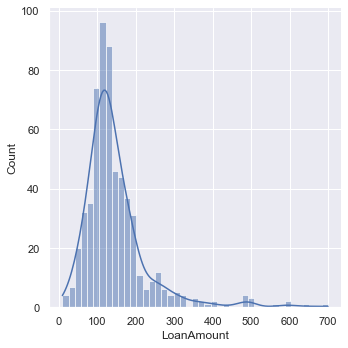

In [163]:
sns.displot(df['LoanAmount'],kde=True);
df['LoanAmount'].skew()

In [164]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [165]:
df['LoanAmount'].isnull().sum()

0

In [166]:
df['LoanAmount'].value_counts()

128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [167]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [168]:
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [169]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Figure size 432x288 with 0 Axes>

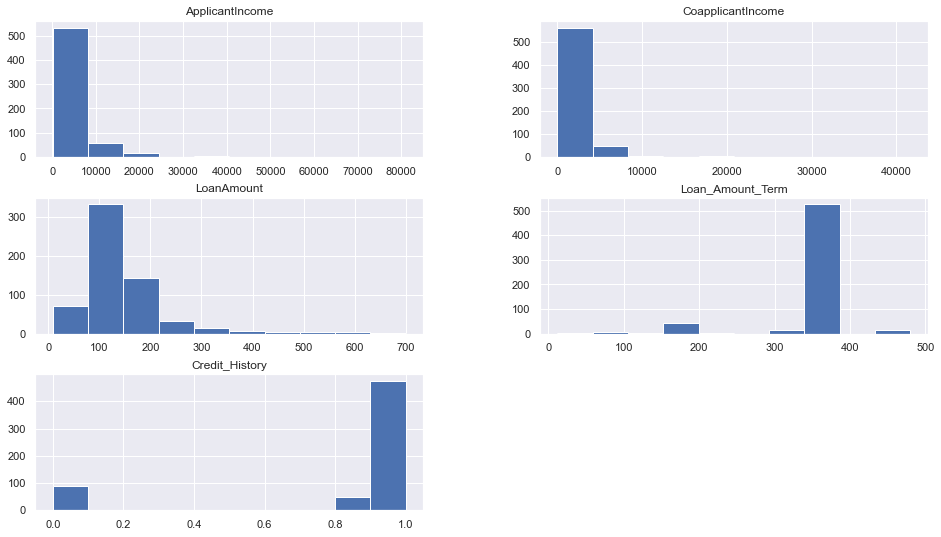

In [170]:
plt.figure()
df.hist(figsize=(16,9));

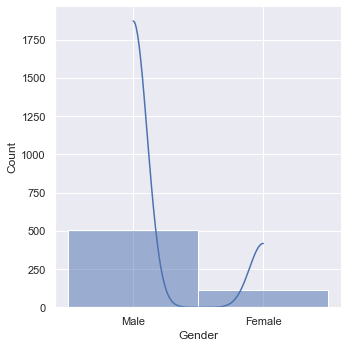

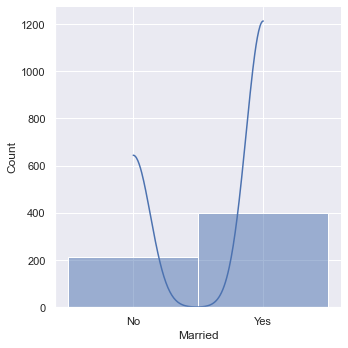

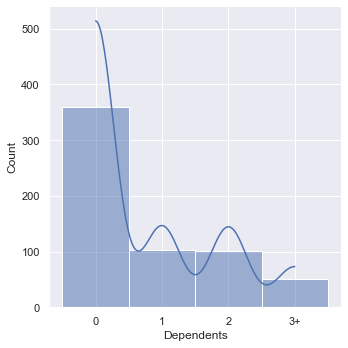

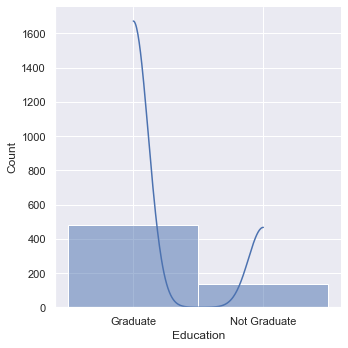

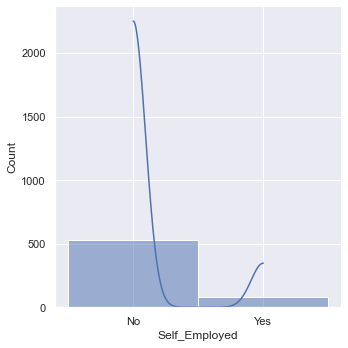

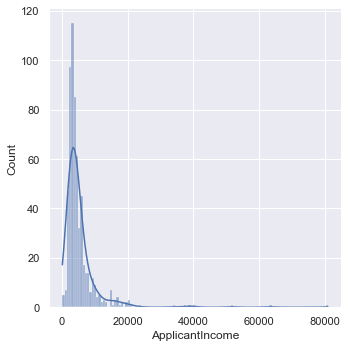

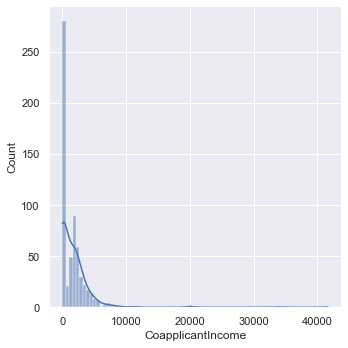

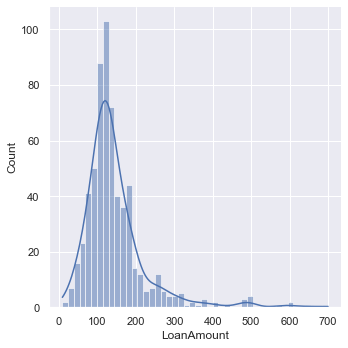

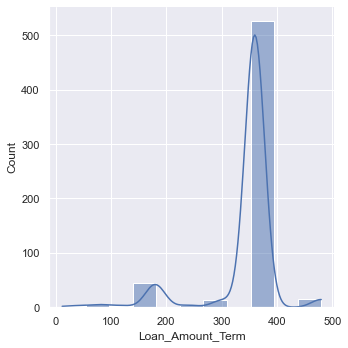

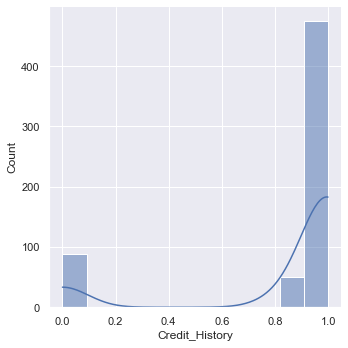

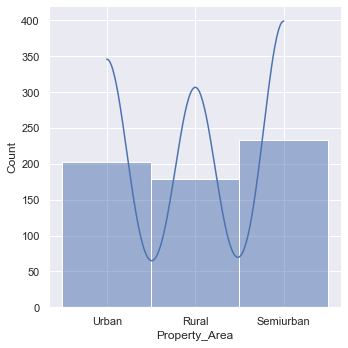

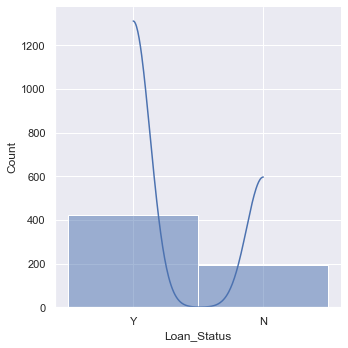

In [171]:
for col in df.columns:
    sns.displot(df[col],kde=True);

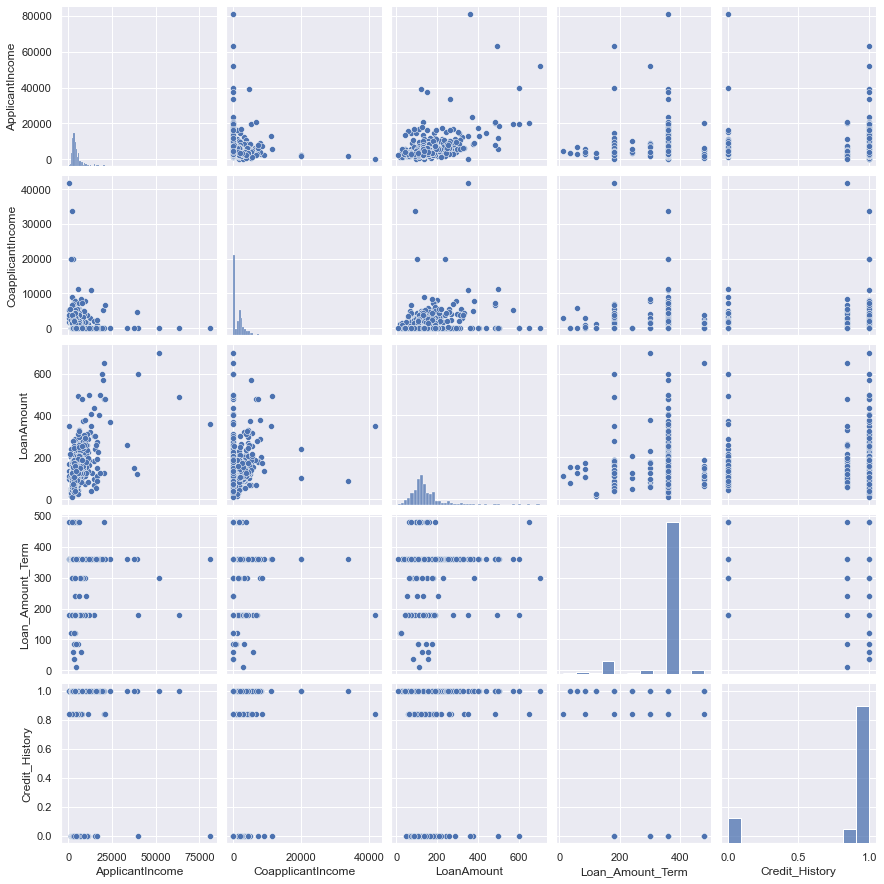

In [172]:
sns.pairplot(data=df)

In [173]:
df.isnull().sum().sum()

0

In [174]:
df.iloc[0]

Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          5849
CoapplicantIncome         0.0
LoanAmount              128.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 0, dtype: object

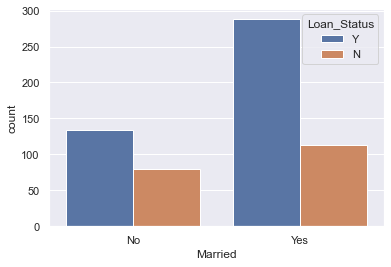

In [175]:
sns.countplot(x='Married',hue='Loan_Status',data=df);

<AxesSubplot:xlabel='Education', ylabel='count'>

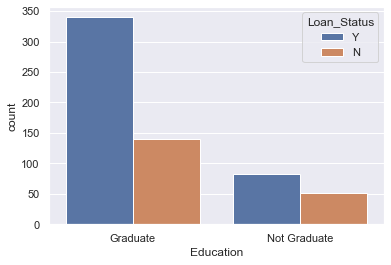

In [176]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

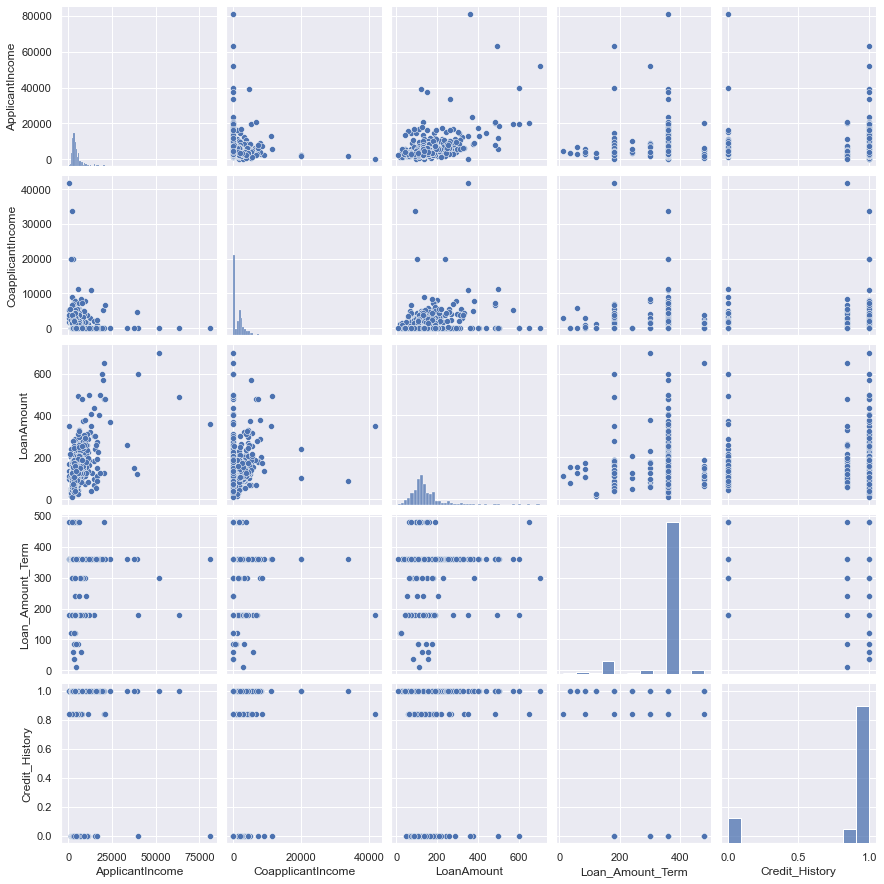

In [177]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

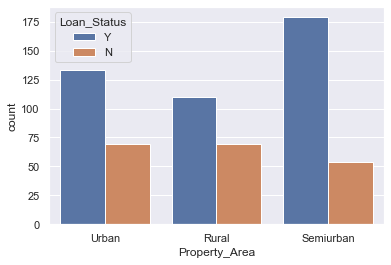

In [178]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

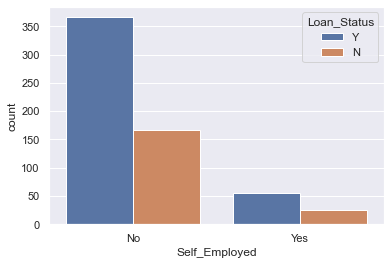

In [179]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

In [180]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [181]:
df['Dependents'].replace({'3+':'3'},inplace=True)

In [182]:
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [183]:
df['Dependents']=df['Dependents'].astype('int')

In [184]:
df['Dependents'].dtypes

dtype('int32')

In [185]:
df.iloc[0]

Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          5849
CoapplicantIncome         0.0
LoanAmount              128.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 0, dtype: object

In [186]:
df.dtypes

Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [187]:
df.iloc[0]

Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          5849
CoapplicantIncome         0.0
LoanAmount              128.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 0, dtype: object

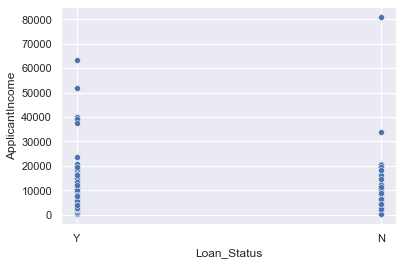

In [188]:
sns.scatterplot(x='Loan_Status',y='ApplicantIncome',data=df);

In [189]:
#if ApplicantIncome income greater than 20000 then there is less possibiity that he will get loan

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

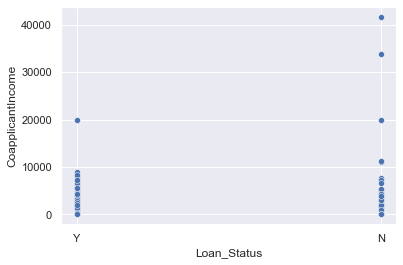

In [190]:
sns.scatterplot(x='Loan_Status',y='CoapplicantIncome',data=df)

In [191]:
#if CoapplicantIncome income greater than 10000 then there is less possibiity that he will get loan

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

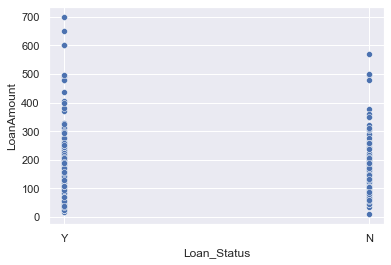

In [192]:
sns.scatterplot(x='Loan_Status',y='LoanAmount',data=df)

In [193]:
#If Loan Amount is greater than 600 then there is less possibility for loan

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

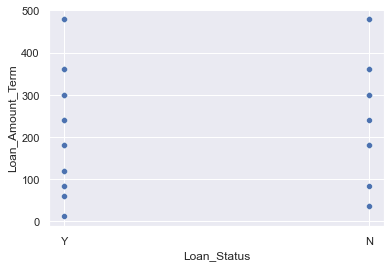

In [194]:
sns.scatterplot(x='Loan_Status',y='Loan_Amount_Term',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

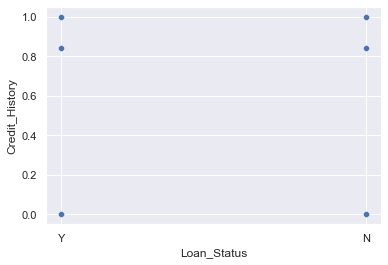

In [195]:
sns.scatterplot(x='Loan_Status',y='Credit_History',data=df)

In [196]:
#Checking For Outliers

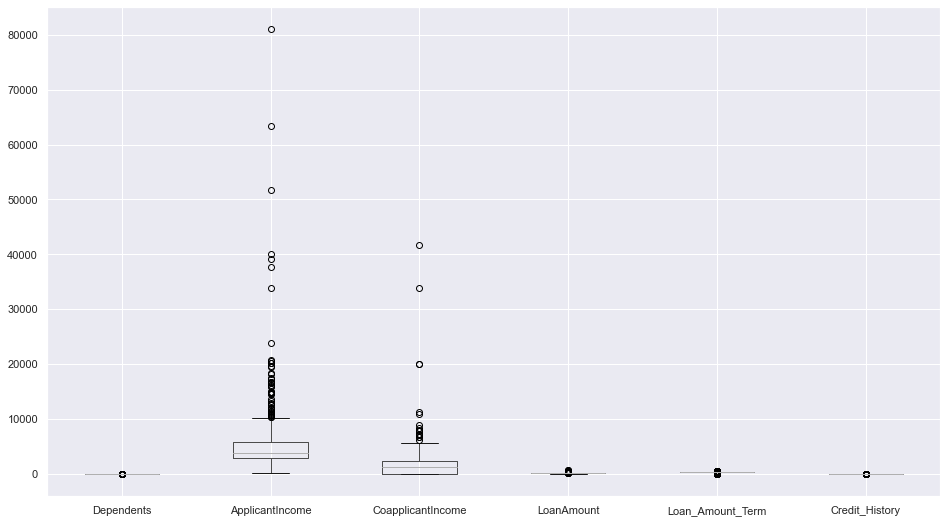

In [197]:
plt.figure(figsize=(16,9))
df.boxplot();

In [309]:
features = [ 'ApplicantIncome', 'CoapplicantIncome']
features

['ApplicantIncome', 'CoapplicantIncome']

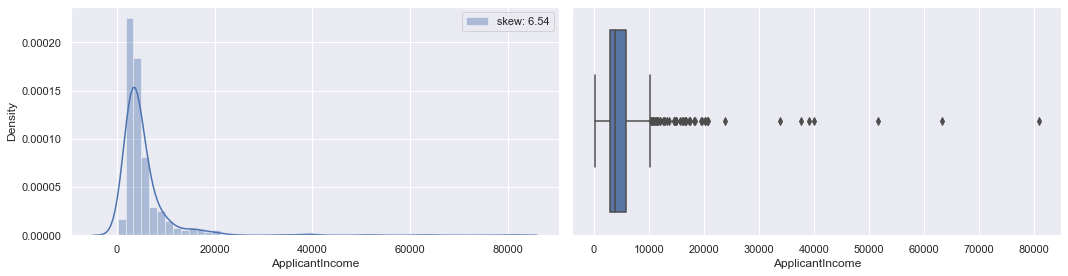

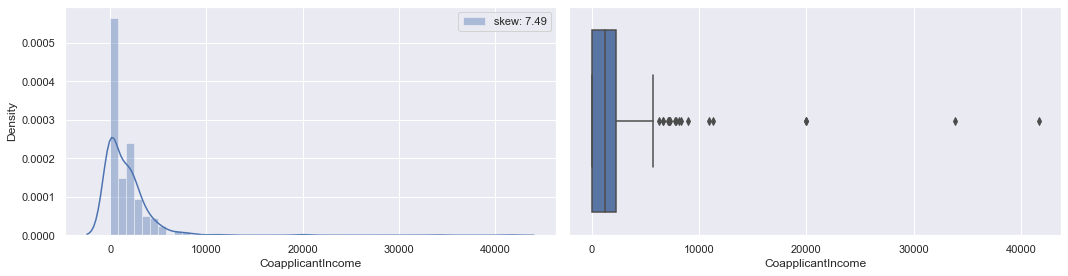

In [310]:
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [311]:
df_cap=df.copy()

In [312]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [313]:
iqr_capping(df_cap, features, 1.5)

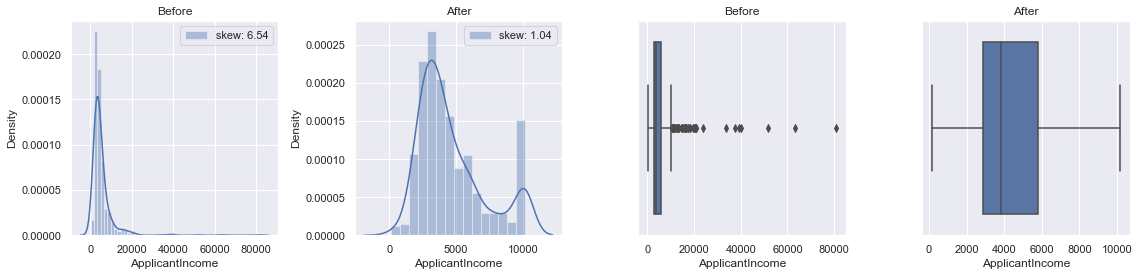

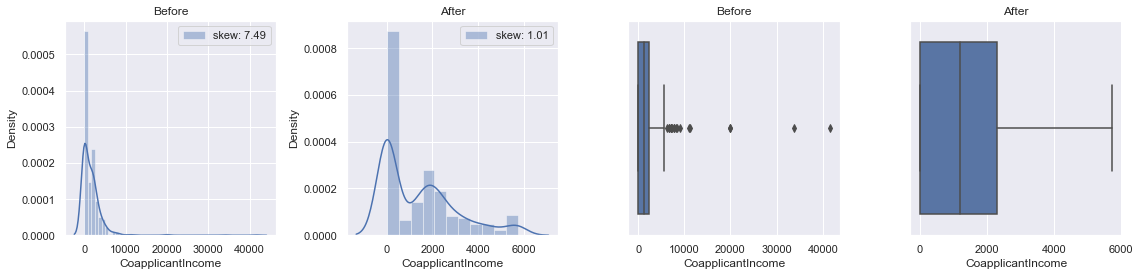

In [314]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [315]:
df_cap.value_counts('Loan_Status')

Loan_Status
Y    422
N    192
dtype: int64

In [316]:
df['Dependents'].dtypes

dtype('int32')

In [317]:
df_cap.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N


In [318]:
X=df_cap.drop(columns='Loan_Status',axis='columns')

In [319]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban


In [320]:
cols=X[['Gender','Married','Education','Self_Employed','Property_Area']]

In [321]:
coll=pd.get_dummies(cols,drop_first=True)

In [322]:
X=pd.concat([X,coll],axis=1)

In [323]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,1,0,0,0,0,1
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,1,1,0,0,0,0
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1,1,0,1,0,1
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1,1,1,0,0,1
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,0,0,0,0,0,0
610,Male,Yes,3,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,1,1,0,0,0,0
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,1,1,0,0,0,1
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,1,1,0,0,0,1


In [324]:
X.drop(columns=['Gender','Married','Education','Property_Area','Self_Employed'],inplace=True,axis=1)

In [325]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.0,0.0,128.0,360.0,1.0,1,0,0,0,0,1
1,1,4583.0,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000.0,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,0,2583.0,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,0,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900.0,0.0,71.0,360.0,1.0,0,0,0,0,0,0
610,3,4106.0,0.0,40.0,180.0,1.0,1,1,0,0,0,0
611,1,8072.0,240.0,253.0,360.0,1.0,1,1,0,0,0,1
612,2,7583.0,0.0,187.0,360.0,1.0,1,1,0,0,0,1


In [326]:
X['Dependents'].dtypes

dtype('int32')

In [327]:
y=df_cap['Loan_Status']

In [328]:
le=LabelEncoder()

In [329]:
y=le.fit_transform(y)

In [330]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [331]:
cols_to_scale=X[['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

In [332]:
cols_to_scale

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0,5849.0,0.0,128.0,360.0
1,1,4583.0,1508.0,128.0,360.0
2,0,3000.0,0.0,66.0,360.0
3,0,2583.0,2358.0,120.0,360.0
4,0,6000.0,0.0,141.0,360.0
...,...,...,...,...,...
609,0,2900.0,0.0,71.0,360.0
610,3,4106.0,0.0,40.0,180.0
611,1,8072.0,240.0,253.0,360.0
612,2,7583.0,0.0,187.0,360.0


In [333]:
scale=StandardScaler()

In [334]:
X_trans=scale.fit_transform(cols_to_scale)

In [335]:
X_trans

array([[-0.73780632,  0.49716393, -0.87458735, -0.21124125,  0.2732313 ],
       [ 0.25346957, -0.0137667 ,  0.05439458, -0.21124125,  0.2732313 ],
       [-0.73780632, -0.65263178, -0.87458735, -0.94899647,  0.2732313 ],
       ...,
       [ 0.25346957,  1.39431937, -0.72673876,  1.27616847,  0.2732313 ],
       [ 1.24474546,  1.19696939, -0.87458735,  0.49081614,  0.2732313 ],
       [-0.73780632, -0.0137667 , -0.87458735, -0.15174486,  0.2732313 ]])

In [336]:
X[['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]=X_trans

In [337]:
X_trans.shape

(614, 5)

In [338]:
X.shape

(614, 12)

In [339]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,-0.737806,0.497164,-0.874587,-0.211241,0.273231,1.0,1,0,0,0,0,1
1,0.253470,-0.013767,0.054395,-0.211241,0.273231,1.0,1,1,0,0,0,0
2,-0.737806,-0.652632,-0.874587,-0.948996,0.273231,1.0,1,1,0,1,0,1
3,-0.737806,-0.820924,0.578025,-0.306435,0.273231,1.0,1,1,1,0,0,1
4,-0.737806,0.558104,-0.874587,-0.056551,0.273231,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.737806,-0.692990,-0.874587,-0.889500,0.273231,1.0,0,0,0,0,0,0
610,2.236021,-0.206274,-0.874587,-1.258378,-2.522836,1.0,1,1,0,0,0,0
611,0.253470,1.394319,-0.726739,1.276168,0.273231,1.0,1,1,0,0,0,1
612,1.244745,1.196969,-0.874587,0.490816,0.273231,1.0,1,1,0,0,0,1


In [340]:
rfc=RandomForestClassifier()

In [341]:
rfc=cross_val_score(rfc,X,y,scoring='accuracy',cv=10,n_jobs=-1)

In [342]:
rfc

array([0.80645161, 0.77419355, 0.75806452, 0.74193548, 0.73770492,
       0.78688525, 0.81967213, 0.7704918 , 0.7704918 , 0.83606557])

In [343]:
rfc.mean()

0.7801956636700159

In [344]:
dt=DecisionTreeClassifier()

In [345]:
dtc=cross_val_score(dt,X,y,scoring='accuracy',cv=10,n_jobs=-1)

In [346]:
dtc

array([0.64516129, 0.75806452, 0.70967742, 0.69354839, 0.62295082,
       0.73770492, 0.78688525, 0.62295082, 0.73770492, 0.72131148])

In [347]:
dtc.mean()

0.7035959809624537

In [348]:
xg=XGBClassifier()

In [349]:
xgc=cross_val_score(xg,X,y,scoring='accuracy',cv=10,n_jobs=-1)

In [350]:
xgc

array([0.74193548, 0.72580645, 0.72580645, 0.70967742, 0.7704918 ,
       0.72131148, 0.86885246, 0.73770492, 0.68852459, 0.7704918 ])

In [351]:
xgc.mean()

0.7460602855631941

In [352]:
lrc=LogisticRegression()

In [353]:
lrc=cross_val_score(lrc,X,y,scoring='accuracy',cv=10,n_jobs=-1)

In [354]:
lrc

array([0.80645161, 0.82258065, 0.74193548, 0.75806452, 0.78688525,
       0.78688525, 0.86885246, 0.85245902, 0.80327869, 0.83606557])

In [355]:
lrc.mean()

0.8063458487572712

In [356]:
sc=SVC()

In [357]:
scc=cross_val_score(sc,X,y,scoring='accuracy',cv=10,n_jobs=-1)

In [358]:
scc

array([0.80645161, 0.83870968, 0.75806452, 0.72580645, 0.78688525,
       0.7704918 , 0.86885246, 0.85245902, 0.7704918 , 0.83606557])

In [359]:
scc.mean()

0.801427815970386

In [360]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [361]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [362]:
os=RandomOverSampler(0.95)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_ns)))

Original dataset shape Counter({1: 342, 0: 149})
Resampled dataset shape Counter({1: 342, 0: 324})


In [363]:
xgba=XGBClassifier()

In [364]:
xgbcr=cross_val_score(xgba,X_train_ns,y_train_ns,cv=10,n_jobs=-1)

In [365]:
xgbcr

array([0.86567164, 0.8358209 , 0.8358209 , 0.79104478, 0.82089552,
       0.92537313, 0.89393939, 0.96969697, 0.95454545, 0.96969697])

In [366]:
xgbcr.mean()

0.8862505653550429

In [367]:
svc=SVC()

In [368]:
svsc=cross_val_score(svc,X_train_ns,y_train_ns,cv=10,n_jobs=-1)

In [369]:
svsc

array([0.82089552, 0.74626866, 0.7761194 , 0.70149254, 0.67164179,
       0.7761194 , 0.78787879, 0.75757576, 0.77272727, 0.77272727])

In [370]:
svsc.mean()

0.7583446404341926

In [371]:
rfc=RandomForestClassifier()

In [372]:
rfcv=cross_val_score(rfc,X_train_ns,y_train_ns,cv=10,n_jobs=-1)

In [373]:
rfcv

array([0.88059701, 0.86567164, 0.86567164, 0.85074627, 0.85074627,
       0.88059701, 0.95454545, 0.96969697, 0.96969697, 0.95454545])

In [374]:
rfcv.mean()

0.9042514699231118

In [375]:
dtc=DecisionTreeClassifier()

In [376]:
dtcv=cross_val_score(dtc,X_train_ns,y_train_ns,cv=10,n_jobs=-1)

In [377]:
dtcv

array([0.85074627, 0.86567164, 0.80597015, 0.7761194 , 0.82089552,
       0.82089552, 0.92424242, 0.93939394, 0.92424242, 0.93939394])

In [378]:
dtcv.mean()

0.8667571234735414

In [379]:
#Will Choose Random Forest Classifier

In [380]:
rfag=RandomForestClassifier()

In [381]:
rfag.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [382]:
y_test_pred=rfag.predict(X_test)

In [383]:
X_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
350,-0.737806,1.802337,-0.874587,0.978687,0.273231,1.000000,1,1,0,0,1,0
377,-0.737806,-0.123944,-0.874587,-0.187443,0.273231,0.842199,1,1,0,0,1,0
163,1.244745,-0.181655,0.016816,0.145737,0.273231,1.000000,1,1,0,0,0,0
609,-0.737806,-0.692990,-0.874587,-0.889500,0.273231,1.000000,0,0,0,0,0,0
132,-0.737806,-0.766441,-0.874587,-0.901399,0.273231,1.000000,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
231,-0.737806,-0.363669,-0.874587,-1.234579,-2.522836,1.000000,1,1,0,0,0,0
312,-0.737806,-0.851596,-0.874587,-1.067989,0.273231,1.000000,0,0,0,0,0,0
248,0.253470,-0.700254,0.260767,-0.270738,2.137276,1.000000,1,1,0,0,1,0
11,1.244745,-0.854421,0.258918,-0.437328,0.273231,1.000000,1,1,0,0,0,1


In [384]:
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [385]:
accuracy_score(y_test,y_test_pred)

0.7398373983739838

In [386]:
xgba=XGBClassifier()

In [387]:
xgba.fit(X_train_ns,y_train_ns)

[18:37:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [388]:
y_test_pred=xgba.predict(X_test)

In [389]:
accuracy_score(y_test,y_test_pred)

0.7398373983739838

In [390]:
params={'n_estimators':[140,160,180],'criterion':['gini','entropy'],'max_depth':[100,70,130],
        'min_samples_split':[3,4],'max_features':[10,12]}

In [391]:
rfcs=RandomForestClassifier()

In [392]:
rfcg=GridSearchCV(rfcs,params,cv=10,scoring='accuracy',n_jobs=-1)

In [393]:
rfcg.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [100, 70, 130], 'max_features': [10, 12],
                         'min_samples_split': [3, 4],
                         'n_estimators': [140, 160, 180]},
             scoring='accuracy')

In [394]:
print("\n The best estimator across ALL searched params:\n",rfcg.best_estimator_)
print("\n The best score across ALL searched params:\n",rfcg.best_score_)
print("\n The best parameters across ALL searched params:\n",rfcg.best_params_)


 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=70, max_features=10, min_samples_split=4,
                       n_estimators=180)

 The best score across ALL searched params:
 0.8966757123473542

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 70, 'max_features': 10, 'min_samples_split': 4, 'n_estimators': 180}


In [395]:
rfga=RandomForestClassifier(criterion='gini', max_depth= 70, max_features= 10, 
                             min_samples_split=4,n_estimators=180)

In [396]:
rfga.fit(X_train_ns,y_train_ns)

RandomForestClassifier(max_depth=70, max_features=10, min_samples_split=4,
                       n_estimators=180)

In [397]:
y_train_pred=rfga.predict(X_train_ns)

In [398]:
accuracy_score(y_train_ns,y_train_pred)

1.0

In [399]:
y_test_pred=rfga.predict(X_test)

In [400]:
accuracy_score(y_test,y_test_pred)

0.7479674796747967

In [ ]:
#Snice dataset is very small so due to it getting low accuracy